In [27]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

In [29]:
red_wine = pd.read_csv('winequality.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [31]:
features_num = ['fixed acidity', 'volatile acidity',	'citric acid',	'residual sugar',	'chlorides',	'free sulfur dioxide',	'total sulfur dioxide',	'density',	'pH',	'sulphates',	'alcohol']
features_num

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [32]:
preprocessor = make_column_transformer(
    (StandardScaler(), features_num)
) 

In [33]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks


#Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

In [34]:
x_train = df_train.drop('quality', axis=1)
x_valid = df_valid.drop('quality', axis=1)

x_train = preprocessor.fit_transform(x_train)
x_valid = preprocessor.transform(x_valid)

y_train = df_train['quality']
y_valid = df_valid['quality']

In [35]:
input_shape = x_train.shape[1]
print(input_shape)

11


In [36]:
x_train[:,0].mean() , x_train[:,0].std()

(4.571856744837106e-16, 1.0)

Minimum validation loss: 0.4989589750766754


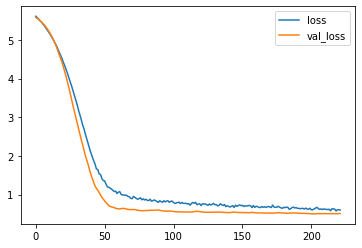

In [37]:
early_stopping = callbacks.EarlyStopping(
    min_delta = 0.001,  #minimum amount of change to count as an improvement
    patience = 20,  #how many epochs to wait before stopping
    restore_best_weights=True,
)

model = keras.Sequential([
    #the hidden relu layers
    layers.Dense(units=32, activation='relu', input_shape=[input_shape]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=32, activation='relu', input_shape=[input_shape]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(units=32, activation='relu', input_shape=[input_shape]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    #the layers output layers
    layers.Dense(units=1)
])

model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping],  #put your callbacks in a list
    verbose=0,  #turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:,['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))



In [38]:
sample_df = red_wine.iloc[67,:].drop(["quality"])
sample_df = pd.DataFrame(sample_df).T

In [39]:
sample_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
67,6.6,0.705,0.07,1.6,0.076,6.0,15.0,0.9962,3.44,0.58,10.7


In [40]:
sample_df = preprocessor.transform(sample_df)

In [41]:
sample_df

array([[-0.96817483,  1.02649389, -1.02809854, -0.71293283, -0.24716781,
        -0.95672703, -0.94892372, -0.29206204,  0.81404895, -0.4846475 ,
         0.24425854]])

In [42]:
model.predict(sample_df)

array([[5.2697005]], dtype=float32)

In [43]:
red_wine.iloc[67,:]

fixed acidity            6.6000
volatile acidity         0.7050
citric acid              0.0700
residual sugar           1.6000
chlorides                0.0760
free sulfur dioxide      6.0000
total sulfur dioxide    15.0000
density                  0.9962
pH                       3.4400
sulphates                0.5800
alcohol                 10.7000
quality                  5.0000
Name: 67, dtype: float64

In [44]:
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_valid)

In [45]:
print(classification_report(y_valid, pred_sgd))

              precision    recall  f1-score   support

           3       0.20      0.33      0.25         3
           4       0.12      0.12      0.12        16
           5       0.60      0.79      0.68       197
           6       0.44      0.36      0.40       187
           7       0.19      0.11      0.14        73
           8       0.00      0.00      0.00         4

    accuracy                           0.49       480
   macro avg       0.26      0.29      0.27       480
weighted avg       0.45      0.49      0.46       480



In [46]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_valid)

In [47]:
print(classification_report(y_valid, pred_svc))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.64      0.83      0.72       197
           6       0.53      0.60      0.56       187
           7       0.93      0.18      0.30        73
           8       0.00      0.00      0.00         4

    accuracy                           0.60       480
   macro avg       0.35      0.27      0.26       480
weighted avg       0.61      0.60      0.56       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [49]:
grid_svc.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [50]:
grid_svc.best_params_


{'C': 1.2, 'gamma': 0.8, 'kernel': 'rbf'}

In [54]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_valid)
print(classification_report(y_valid, pred_svc2))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        16
           5       0.65      0.82      0.73       197
           6       0.58      0.64      0.61       187
           7       0.81      0.29      0.42        73
           8       0.00      0.00      0.00         4

    accuracy                           0.63       480
   macro avg       0.34      0.29      0.29       480
weighted avg       0.62      0.63      0.60       480



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
